Saving student-scores.csv to student-scores (11).csv
Mean Squared Error (MSE): 3.565269812925162
R² Score: 0.9111961692405943


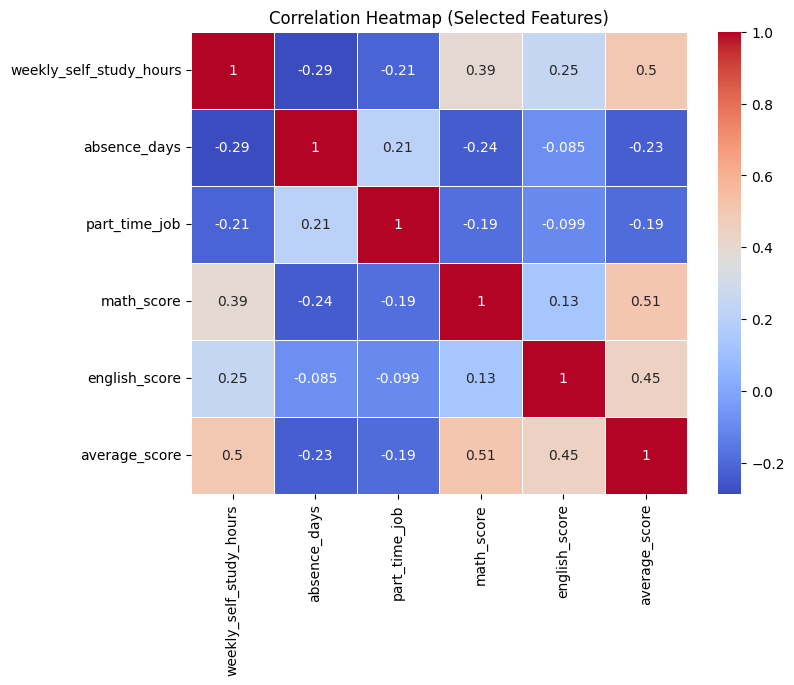

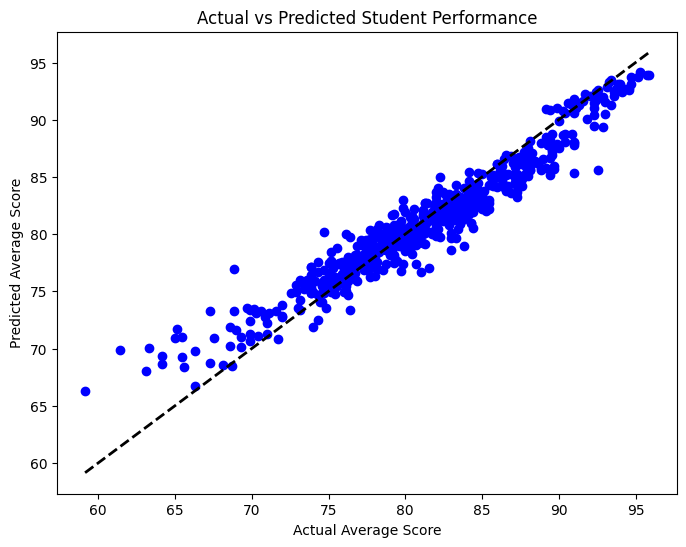

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv('student-scores.csv')

data_cleaned = data.drop(columns=['id', 'first_name', 'last_name', 'email'])

data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

subject_columns = ['math_score', 'history_score', 'physics_score', 'chemistry_score',
                   'biology_score', 'english_score', 'geography_score']
data_cleaned['average_score'] = data_cleaned[subject_columns].mean(axis=1)

features = ['part_time_job', 'absence_days', 'extracurricular_activities',
            'weekly_self_study_hours', 'math_score', 'history_score',
            'physics_score', 'chemistry_score', 'biology_score',
            'english_score', 'geography_score']
X = data_cleaned[features]
y = data_cleaned['average_score']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

selected_columns = ['weekly_self_study_hours', 'absence_days', 'part_time_job',
                    'math_score', 'english_score', 'average_score']

plt.figure(figsize=(8,6))
correlation_matrix = data_cleaned[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.title('Actual vs Predicted Student Performance')
plt.show()
